In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [6]:
evaluation_data = pd.read_csv('./results/results_26_05_2022_08_30_09.csv')

# Results Analysis

In [7]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
evaluation_data.head(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,AbsoluteError
0,WLStarLearner,PDFA - 4e451446a3d14113960a490b313b439d,44,44,1,0.340959,656,4,95.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
1,WLStarLearner,PDFA - 4e451446a3d14113960a490b313b439d,44,44,2,0.353794,656,4,95.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
2,WLStarLearner,PDFA - 4e451446a3d14113960a490b313b439d,44,44,3,0.350749,656,4,95.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
3,WLStarLearner,PDFA - 4e451446a3d14113960a490b313b439d,44,44,4,0.352546,656,4,95.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
4,WLStarLearner,PDFA - 4e451446a3d14113960a490b313b439d,44,44,5,0.386689,656,4,95.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
5,WLStarLearner,PDFA - 4e451446a3d14113960a490b313b439d,44,44,6,0.343988,656,4,95.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
6,WLStarLearner,PDFA - 4e451446a3d14113960a490b313b439d,44,44,7,0.349614,656,4,95.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
7,WLStarLearner,PDFA - 4e451446a3d14113960a490b313b439d,44,44,8,0.343139,656,4,95.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
8,WLStarLearner,PDFA - 4e451446a3d14113960a490b313b439d,44,44,9,0.342681,656,4,95.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
9,WLStarLearner,PDFA - 052dd8831fd54da4acab051b7723b62a,307,307,1,79.171946,6341,8,635.0,10.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0


In [9]:
import math
evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [23]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Number of States']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs, 'Extracted Number of States':funcs, 'STRUCTURE_SIZE':funcs, 'AbsoluteError': funcs, 'Tree Depth':funcs })
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR', 'STRUCTURE_SIZE_median', 'STRUCTURE_SIZE_IQR', 'AbsoluteError_median', 'AbsoluteError_IQR', 'TreeDepth_median', 'TreeDepth_IQR']
grouped_multiple.reset_index(inplace = True)

In [24]:
grouped_multiple

,Algorithm,Number of States,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,...,OOTolerance_median,OOTolerance_IQR,Extracted Number of States_median,Extracted Number of States_IQR,STRUCTURE_SIZE_median,STRUCTURE_SIZE_IQR,AbsoluteError_median,AbsoluteError_IQR,TreeDepth_median,TreeDepth_IQR
0,QuantNaryTreeLearner,42,0.413262,0.013591,525.0,0.0,23.0,0.0,0.000000,0.0,...,0.0,0.0,42.0,0.0,63.0,0.0,0.000000,0.0,4.0,0.0
1,QuantNaryTreeLearner,43,0.399555,0.023841,510.0,0.0,23.0,0.0,0.000000,0.0,...,0.0,0.0,43.0,0.0,64.0,0.0,0.000000,0.0,4.0,0.0
2,QuantNaryTreeLearner,44,0.373275,0.025068,495.0,0.0,20.0,0.0,0.000000,0.0,...,0.0,0.0,44.0,0.0,62.0,0.0,0.000000,0.0,3.0,0.0
3,QuantNaryTreeLearner,49,0.563636,0.044396,576.0,0.0,26.0,0.0,0.000000,0.0,...,0.0,0.0,49.0,0.0,73.0,0.0,0.000000,0.0,4.0,0.0
4,QuantNaryTreeLearner,50,0.406966,0.019627,519.0,0.0,19.0,0.0,0.000036,0.0,...,0.0,0.0,49.0,0.0,66.0,0.0,0.000006,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,WLStarLearner,306,78.478420,0.275141,5616.0,0.0,7.0,0.0,0.000000,0.0,...,0.0,0.0,306.0,0.0,5625.0,0.0,0.000000,0.0,NaN,NaN
66,WLStarLearner,307,79.203892,0.973009,6341.0,0.0,8.0,0.0,0.000000,0.0,...,0.0,0.0,307.0,0.0,6350.0,0.0,0.000000,0.0,NaN,NaN
67,WLStarLearner,308,68.595474,0.327189,5616.0,0.0,5.0,0.0,0.000000,0.0,...,0.0,0.0,308.0,0.0,5625.0,0.0,0.000000,0.0,NaN,NaN
68,WLStarLearner,309,69.435610,0.931847,7196.0,0.0,7.0,0.0,0.000000,0.0,...,0.0,0.0,309.0,0.0,7205.0,0.0,0.000000,0.0,NaN,NaN


In [25]:
len(grouped_multiple)

70

Text(0, 0.5, 'Learning Time Median (s)')

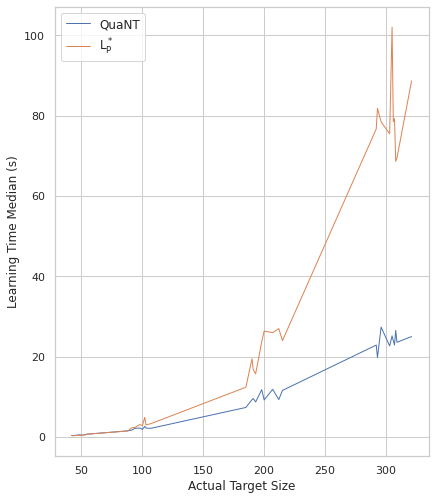

In [26]:
grouped_multiple["LOG_Time(s)_median"] = np.log(grouped_multiple["Time(s)_median"])
grouped_multiple = grouped_multiple.loc[grouped_multiple["Algorithm"] != 'WLStarColLearner' ]

import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
#plt.legend(labels=["QuaNT","$\mathrm{L_{P}^*Col}$", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Learning Time Median (s)", fontsize = 12)

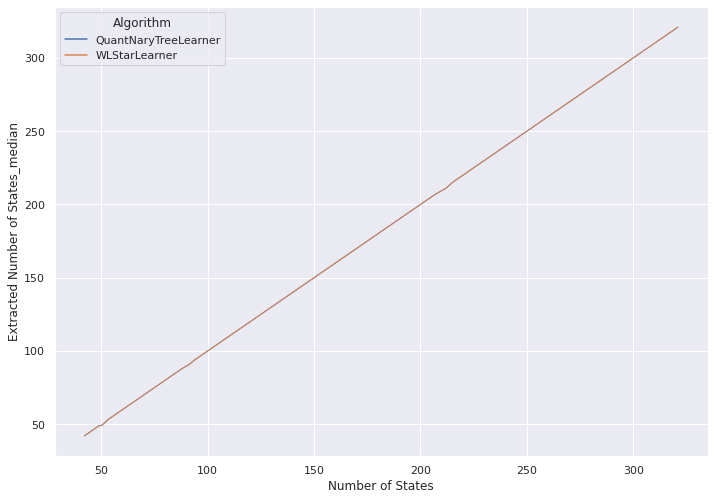

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="Number of States", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)

Text(0, 0.5, 'Speedup')

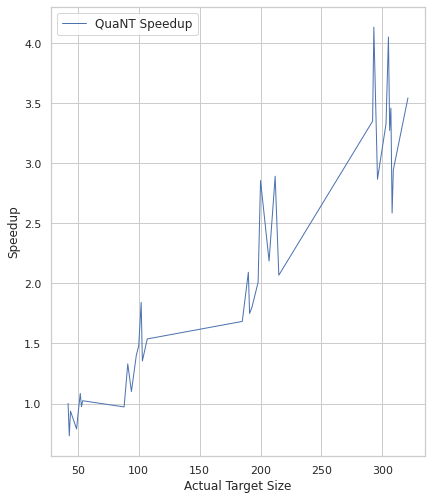

In [28]:
times_QuaNT = np.array(grouped_multiple["Time(s)_median"][0:35])
times_WLStar = np.array(grouped_multiple["Time(s)_median"][35:])
speedup_Q_WL = times_WLStar / times_QuaNT
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})

sns.set_style("whitegrid")
ax = sns.lineplot(x=grouped_multiple['Number of States'][0:35], y=speedup_Q_WL,  linewidth=1)
plt.legend(labels=["QuaNT Speedup"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)

Text(0, 0.5, 'Structure Size Median')

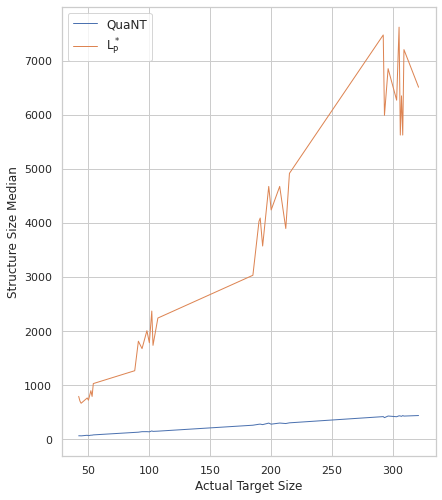

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="STRUCTURE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Structure Size Median", fontsize = 12)

# Tree Depth Analysis

In [30]:
evaluation_data_Quant = evaluation_data.loc[evaluation_data["Algorithm"] == 'QuantNaryTreeLearner' ]
evaluation_data_Quant.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time (s)', 'LastTokenQuery',
       'EquivalenceQuery', 'OT Prefixes', 'OT Suffixes', 'Tree Depth',
       'Inner Nodes', 'LogProbError', 'WER', 'NDCG', 'OOPartition',
       'OOTolerance', 'AbsoluteError', 'OT_SIZE', 'TREE_SIZE',
       'STRUCTURE_SIZE'],
      dtype='object')

In [18]:
evaluation_data_Quant['Tree Depth'].value_counts()

5.0    171
4.0    171
3.0     18
Name: Tree Depth, dtype: int64

Text(0, 0.5, 'Tree Depth')

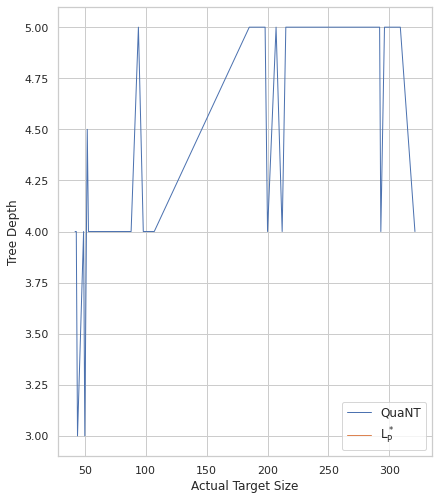

In [32]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="TreeDepth_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Tree Depth", fontsize = 12)